DWV lab exam

In [1]:
import pandas as pd
df = pd.read_excel('/content/extended_mobile_sales_trends.xlsx')
df.head()

,Date of Sale,Mobile Brand,Model,Units Sold,Selling Price (in USD),Customer Rating,Region,Operating System,Return Rate,Popularity Index,Age Group Preference,Feature Trend,Sales Channel
0,2023-10-12,Samsung,Galaxy S20,45,407.14,1.6,Africa,Android,0.09,3.65,55+,Price-Performance,In-Store
1,2024-07-05,Samsung,Galaxy S20,85,593.02,1.1,Asia,Android,0.04,9.78,55+,Battery Life,In-Store
2,2023-01-11,OnePlus,OnePlus 9,74,782.12,3.2,Asia,Android,0.01,7.53,25-34,Camera Quality,Online
3,2022-11-01,Nokia,Nokia 5.4,38,621.67,2.1,Africa,Android,0.01,9.60,35-44,Camera Quality,Online
4,2023-03-25,Apple,iPhone 13,99,593.75,2.1,North America,iOS,0.03,9.91,35-44,Battery Life,Online


In [5]:
# prompt: checking null values

# Check for null values in the DataFrame
print(df.isnull().sum())

Date of Sale              0
Mobile Brand              0
Model                     0
Units Sold                0
Selling Price (in USD)    0
Customer Rating           0
Region                    0
Operating System          0
Return Rate               0
Popularity Index          0
Age Group Preference      0
Feature Trend             0
Sales Channel             0
dtype: int64


In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [13]:
print(df.columns)

Index(['Date of Sale', 'Mobile Brand', 'Model', 'Units Sold',
       'Selling Price (in USD)', 'Customer Rating', 'Region',
       'Operating System', 'Return Rate', 'Popularity Index',
       'Age Group Preference', 'Feature Trend', 'Sales Channel'],
      dtype='object')


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Normalize 'Units Sold' and 'Selling Price'
scaler = MinMaxScaler()
df[['Units Sold', 'Selling Price (in USD)']] = scaler.fit_transform(df[['Units Sold', 'Selling Price (in USD)']])

# Show scaled values
print(df[['Units Sold', 'Selling Price (in USD)']].head())



   Units Sold  Selling Price (in USD)
0    0.393258                0.249816
1    0.842697                0.432003
2    0.719101                0.617346
3    0.314607                0.460084
4    1.000000                0.432719


In [26]:
# Remove outliers (Units Sold above 95th percentile)
threshold = df['Units Sold'].quantile(0.95)
df_cleaned = df[df['Units Sold'] <= threshold]

print("Data after removing outliers:\n", df_cleaned.describe())


Data after removing outliers:
               Date of Sale  Units Sold  Selling Price (in USD)  \
count                   72   72.000000               72.000000   
mean   2023-09-06 19:00:00    0.468009                0.486639   
min    2022-11-01 00:00:00    0.000000                0.000000   
25%    2023-03-18 18:00:00    0.247191                0.216590   
50%    2023-08-02 00:00:00    0.432584                0.483534   
75%    2024-03-08 12:00:00    0.702247                0.701295   
max    2024-09-24 00:00:00    0.955056                1.000000   
std                    NaN    0.272158                0.290254   

       Customer Rating  Return Rate  Popularity Index  Day of Sale  \
count        72.000000    72.000000         72.000000    72.000000   
mean          2.987500     0.051250          5.839583    16.736111   
min           1.100000     0.000000          1.180000     1.000000   
25%           1.900000     0.030000          3.482500    11.000000   
50%           2.850000  

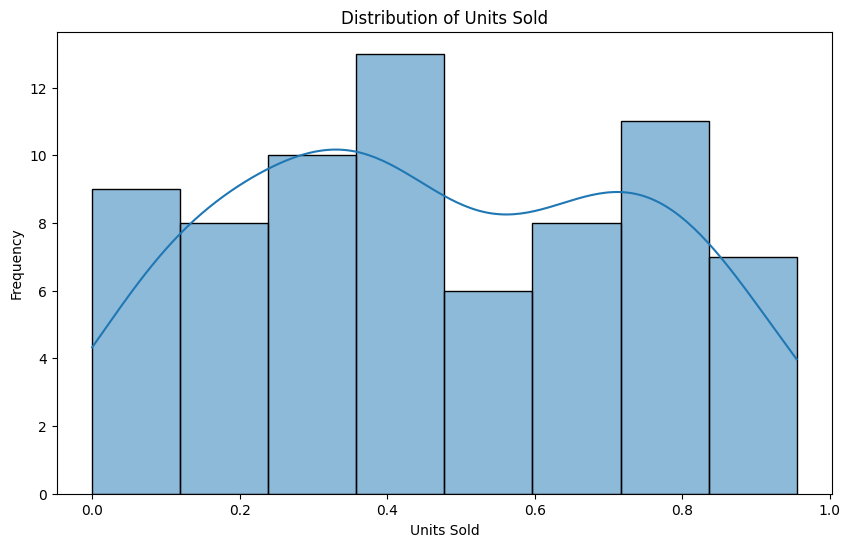

In [42]:
# prompt: give me some graphs for above datasets

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Units Sold Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Units Sold'], kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()







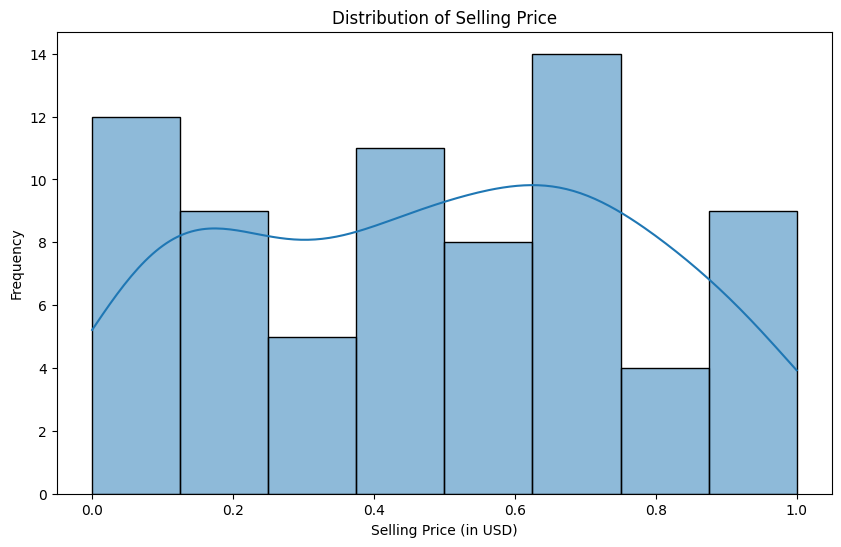

In [43]:
# 2. Selling Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Selling Price (in USD)'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in USD)')
plt.ylabel('Frequency')
plt.show()


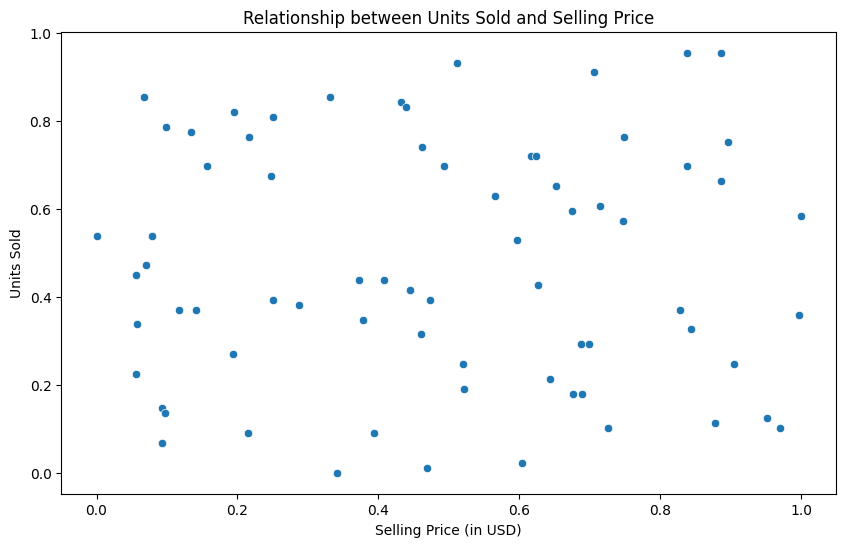

In [44]:
# 3. Relationship between Units Sold and Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Selling Price (in USD)', y='Units Sold', data=df_cleaned)
plt.title('Relationship between Units Sold and Selling Price')
plt.xlabel('Selling Price (in USD)')
plt.ylabel('Units Sold')
plt.show()

In [31]:
# prompt: give me sunburst graph

!pip install plotly

import plotly.express as px
import pandas as pd

# Create a hierarchical structure for sunburst chart
df_sunburst = df_cleaned.groupby(['Mobile Brand', 'Model'])['Units Sold'].sum().reset_index()

# Create the sunburst chart
fig = px.sunburst(df_sunburst, path=['Mobile Brand', 'Model'], values='Units Sold',
                  title='Sales Distribution by Mobile Brand and Model')

fig.show()

In [32]:
fig = px.scatter(df,
                 x='Selling Price (in USD)',
                 y='Units Sold',
                 size='Customer Rating',
                 color='Mobile Brand',
                 title='Bubble Chart of Units Sold vs Selling Price')
fig.show()


Unique Operating Systems: ['Android' 'iOS']


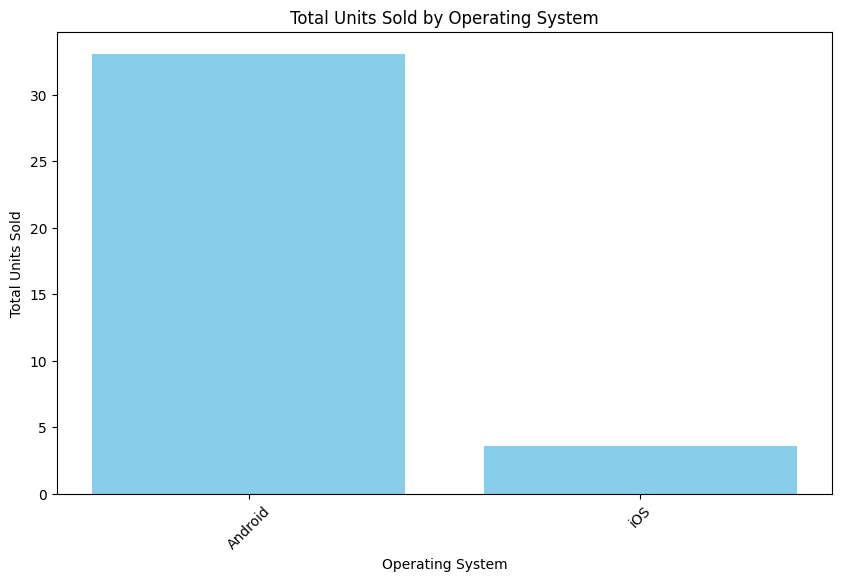

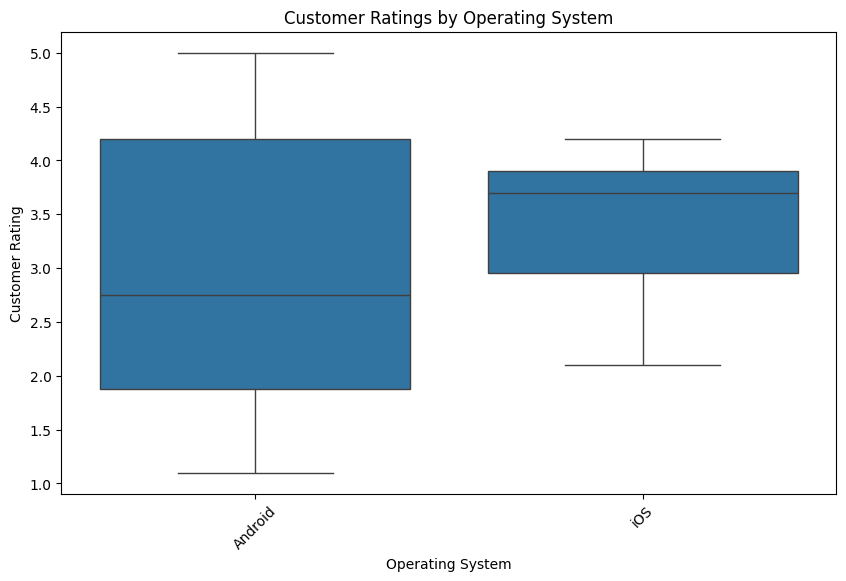

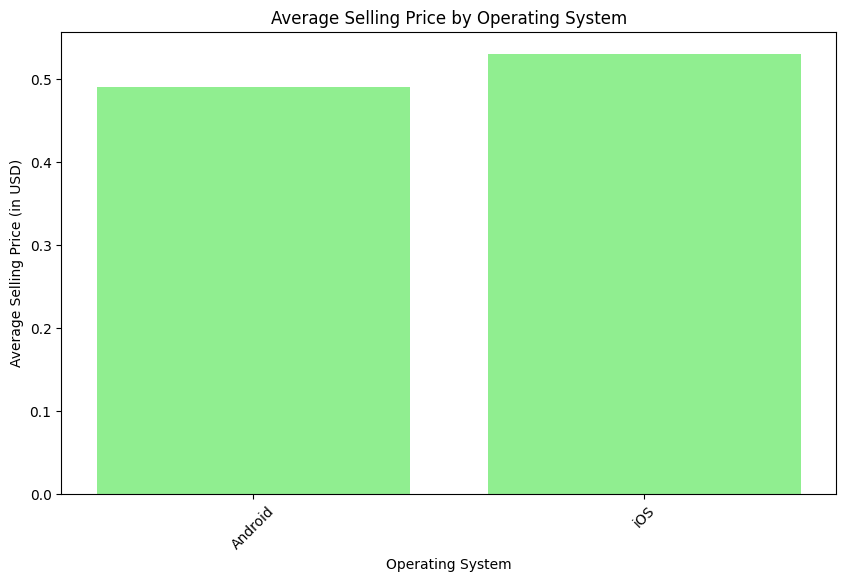

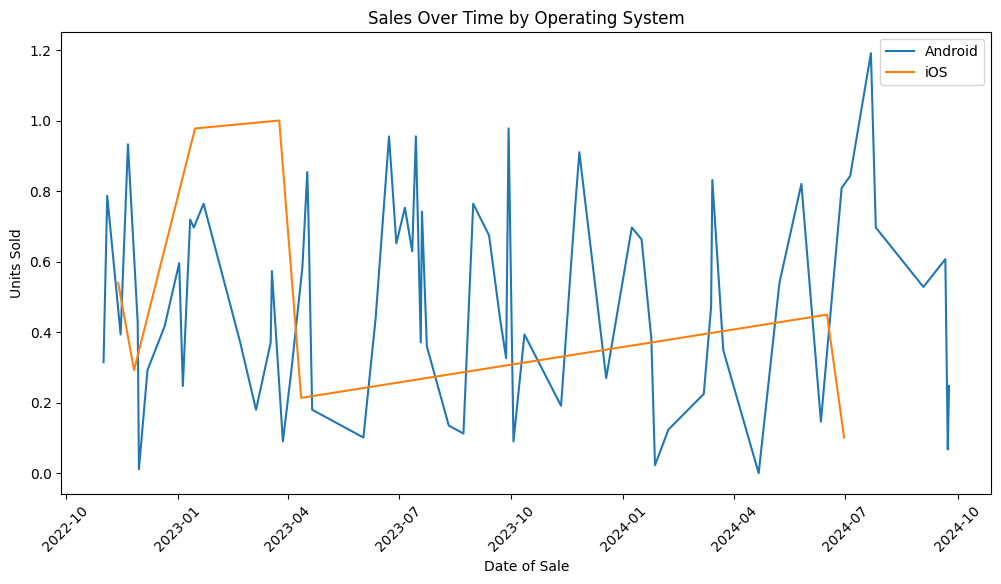

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Get unique operating systems
unique_os = df['Operating System'].unique()
print("Unique Operating Systems:", unique_os)

# 1. Total Units Sold by Operating System
os_sales = df.groupby('Operating System')['Units Sold'].sum().reset_index()

# Plotting Total Units Sold
plt.figure(figsize=(10, 6))
plt.bar(os_sales['Operating System'], os_sales['Units Sold'], color='skyblue')
plt.title('Total Units Sold by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()

# 2. Customer Ratings by Operating System
plt.figure(figsize=(10, 6))
sns.boxplot(x='Operating System', y='Customer Rating', data=df)
plt.title('Customer Ratings by Operating System')
plt.ylabel('Customer Rating')
plt.xticks(rotation=45)
plt.show()

# 3. Average Selling Price by Operating System
avg_price_os = df.groupby('Operating System')['Selling Price (in USD)'].mean().reset_index()

# Plotting Average Selling Price
plt.figure(figsize=(10, 6))
plt.bar(avg_price_os['Operating System'], avg_price_os['Selling Price (in USD)'], color='lightgreen')
plt.title('Average Selling Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Selling Price (in USD)')
plt.xticks(rotation=45)
plt.show()

# 4. Sales Over Time by Operating System
os_sales_time = df.groupby(['Date of Sale', 'Operating System'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
for os in os_sales_time['Operating System'].unique():
    os_data = os_sales_time[os_sales_time['Operating System'] == os]
    plt.plot(os_data['Date of Sale'], os_data['Units Sold'], label=os)

plt.title('Sales Over Time by Operating System')
plt.xlabel('Date of Sale')
plt.ylabel('Units Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x600 with 0 Axes>

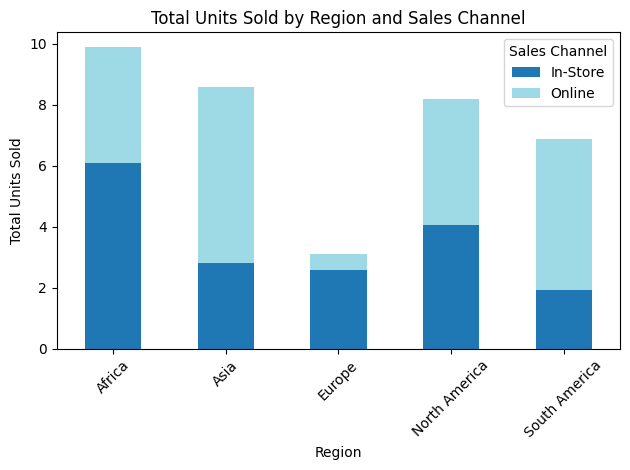

<Figure size 1200x600 with 0 Axes>

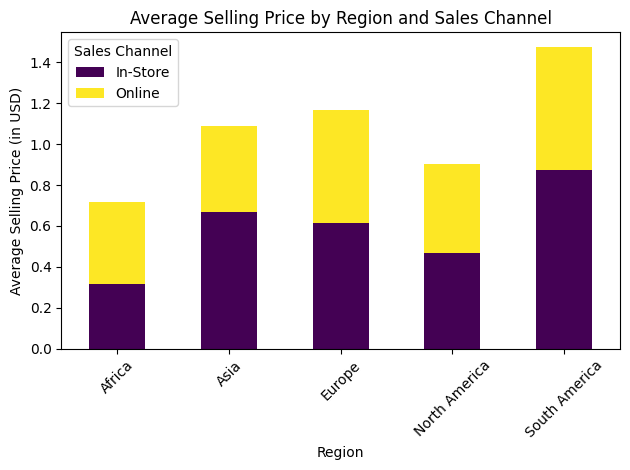

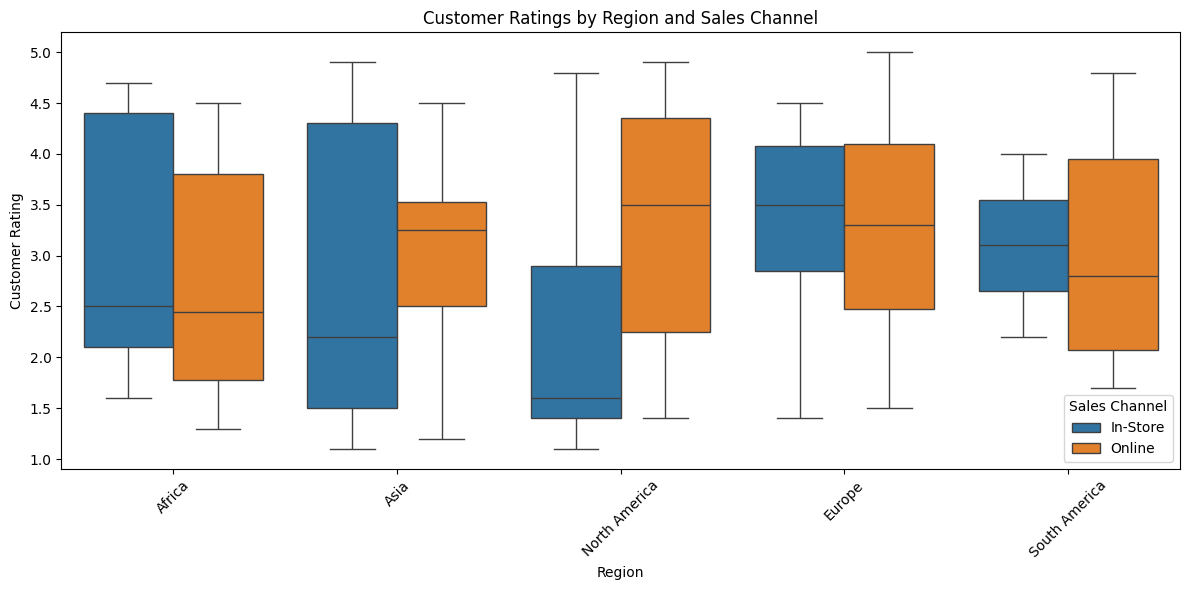

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Total Units Sold by Region and Sales Channel
region_channel_sales = df.groupby(['Region', 'Sales Channel'])['Units Sold'].sum().unstack()

# Plotting Total Units Sold
plt.figure(figsize=(12, 6))
region_channel_sales.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Total Units Sold by Region and Sales Channel')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Sales Channel')
plt.tight_layout()
plt.show()

# 2. Average Selling Price by Region and Sales Channel
avg_price_region_channel = df.groupby(['Region', 'Sales Channel'])['Selling Price (in USD)'].mean().unstack()

# Plotting Average Selling Price
plt.figure(figsize=(12, 6))
avg_price_region_channel.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Average Selling Price by Region and Sales Channel')
plt.xlabel('Region')
plt.ylabel('Average Selling Price (in USD)')
plt.xticks(rotation=45)
plt.legend(title='Sales Channel')
plt.tight_layout()
plt.show()

# 3. Customer Ratings by Region and Sales Channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Customer Rating', hue='Sales Channel', data=df)
plt.title('Customer Ratings by Region and Sales Channel')
plt.xlabel('Region')
plt.ylabel('Customer Rating')
plt.xticks(rotation=45)
plt.legend(title='Sales Channel')
plt.tight_layout()
plt.show()



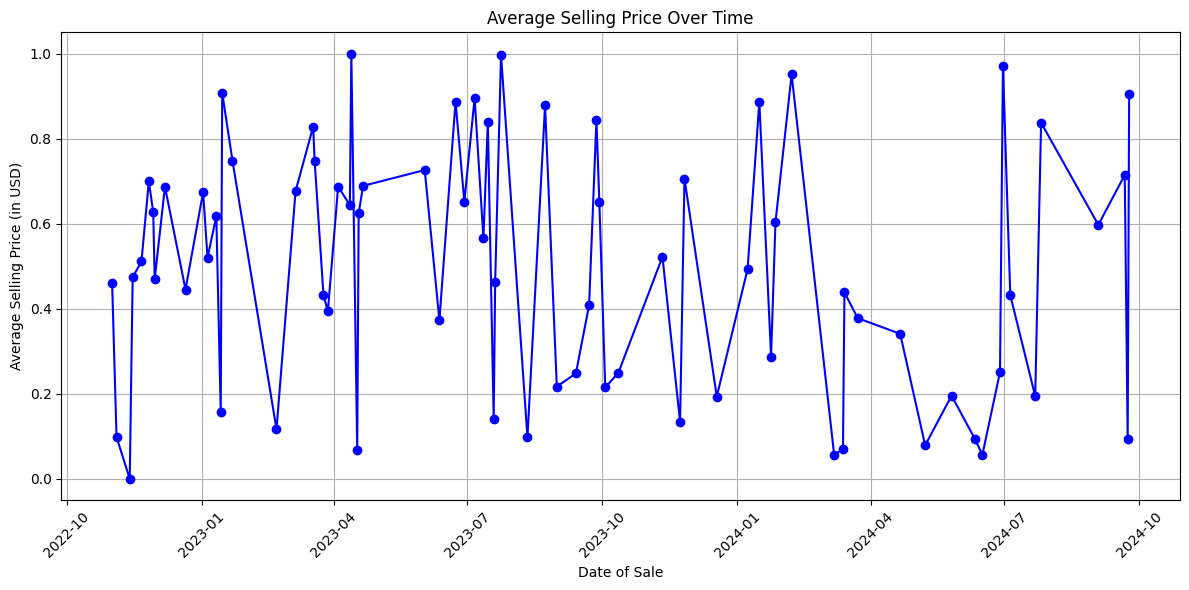

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ensure 'Date of Sale' is in datetime format
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])

# 1. Average Selling Price Over Time
avg_price_over_time = df.groupby('Date of Sale')['Selling Price (in USD)'].mean().reset_index()

# Plotting Average Selling Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(avg_price_over_time['Date of Sale'], avg_price_over_time['Selling Price (in USD)'], marker='o', color='blue')
plt.title('Average Selling Price Over Time')
plt.xlabel('Date of Sale')
plt.ylabel('Average Selling Price (in USD)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



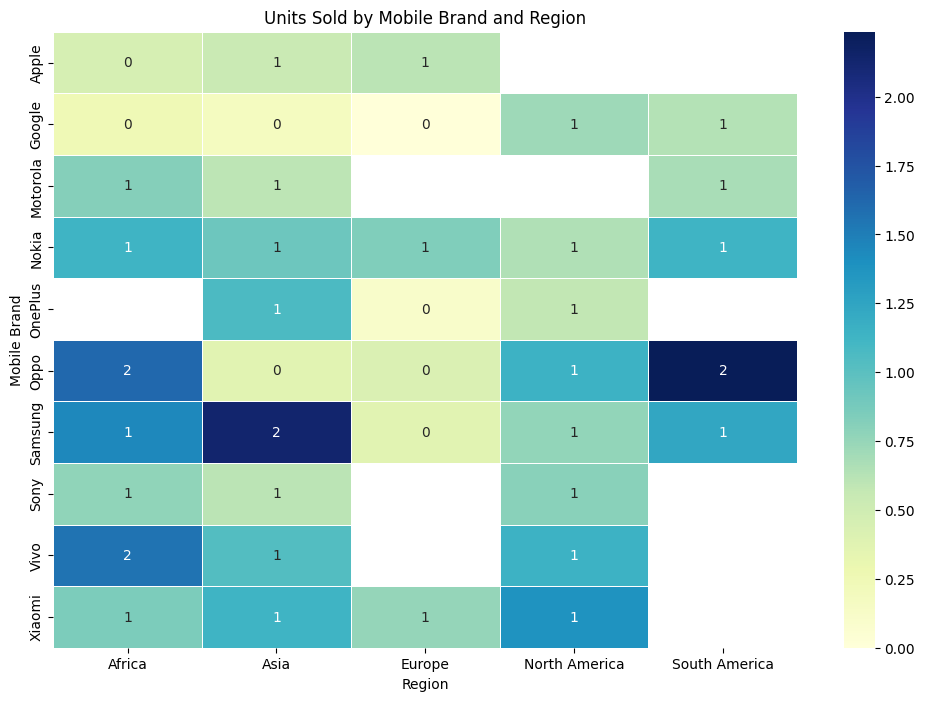

In [52]:
# prompt: GENERATE HEATMAP

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your cleaned DataFrame
# Create a pivot table for the heatmap
heatmap_data = df_cleaned.pivot_table(values='Units Sold', index='Mobile Brand', columns='Region', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Units Sold by Mobile Brand and Region')
plt.xlabel('Region')
plt.ylabel('Mobile Brand')
plt.show()